In [1]:
import pandas as pd

In [2]:
df_winery = pd.read_csv('tokenized_wine_data_winery.csv')

df_winery.head()

,Unnamed: 0,Unnamed: 0.1,description,winery,filtered,tokenized_sent
0,0,0,"['rich', 'gold', 'in', 'color.', 'broad,', 'la...",Domaine Zind-Humbrecht,"rich gold color. broad, layered aromas ripe fr...","['rich', 'gold', 'color', 'broad', 'layered', ..."
1,1,1,"['flinty', 'reduction', 'still', 'dominates', ...",Domaine Zind-Humbrecht,flinty reduction still dominates nose sign you...,"['flinty', 'reduction', 'still', 'dominates', ..."
2,2,2,"['flinty', 'overtones', 'of', 'yeast', 'reveal...",Domaine Zind-Humbrecht,flinty overtones yeast reveal young wine is. v...,"['flinty', 'overtones', 'yeast', 'reveal', 'yo..."
3,3,3,"['beautifully', 'balanced,', 'this', 'conveys'...",Domaine Zind-Humbrecht,"beautifully balanced, conveys rich fruit tense...","['beautifully', 'balanced', 'conveys', 'rich',..."
4,4,4,"['profound', 'enough', 'for', 'serious', 'cont...",Domaine Zind-Humbrecht,profound enough serious contemplation enough b...,"['profound', 'enough', 'serious', 'contemplati..."


In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
count_vect = CountVectorizer()
tfidf = TfidfTransformer()
cv = CountVectorizer().fit_transform(df_winery.tokenized_sent)
bagofwords = tfidf.fit_transform(cv)
bagofwords

<4435x7245 sparse matrix of type '<class 'numpy.float64'>'
	with 112188 stored elements in Compressed Sparse Row format>

In [5]:
data = df_winery.values
y = data[:,3]
y

array(['Domaine Zind-Humbrecht', 'Domaine Zind-Humbrecht',
       'Domaine Zind-Humbrecht', ..., 'Albert Bichot', 'Albert Bichot',
       'Albert Bichot'], dtype=object)

In [6]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

In [7]:
svd = TruncatedSVD(200)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)
X = lsa.fit_transform(bagofwords)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [10]:
results = {}
for clf_type in ["Random-Forest", "Gradient-Boosting"]:

    acc_results = []  # accuracy
    if clf_type is "Random-Forest":
        n_estimators = [200, 500]
    elif clf_type is "Gradient-Boosting":                                      
        n_estimators = [50, 100]
    
    for n_estimator in n_estimators:
        print("train....... (num trees = {:d} in {:s})".format(n_estimator, clf_type))
        if clf_type is "Random-Forest":
            clf = RandomForestClassifier(n_estimators=n_estimator)
        elif clf_type is "Gradient-Boosting":
            clf = GradientBoostingClassifier(n_estimators=n_estimator, max_depth=2)

        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        acc_results.append(100 * accuracy_score(y_test, y_pred))
        print("done.")
    results[clf_type] = (n_estimators, acc_results)

train....... (num trees = 200 in Random-Forest)
done.
train....... (num trees = 500 in Random-Forest)
done.
train....... (num trees = 50 in Gradient-Boosting)
done.
train....... (num trees = 100 in Gradient-Boosting)
done.


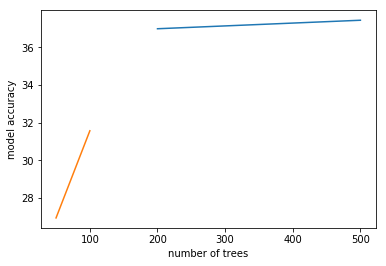

In [13]:
import matplotlib.pyplot as plt
for clf_type in ["Random-Forest", "Gradient-Boosting"]:
    plt.plot(results[clf_type][0], results[clf_type][1])
    plt.xlabel("number of trees")
    plt.ylabel("model accuracy")
plt.show()